# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/zerocoder/python/pn14/amazon_market_data.csv')

In [ ]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


# Приведение столбцов к стилю camel_case

In [ ]:
# Функция для преобразования в camelCase
def to_camel_case(name):
    # Разделяем по пробелам или другим разделителям (например, '_')
    parts = name.replace('_', ' ').split()  # Заменяем '_' на пробелы и делим по пробелам
    if len(parts) == 1:
        return parts[0].lower()  # Если одно слово, делаем его строчным
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

# Применяем функцию к каждому названию столбца
new_columns = [to_camel_case(col) for col in df.columns]

# Создаем новый датафрейм с обновленными названиями столбцов
df.columns = new_columns

# Выводим результат
print(df.columns)

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment',
       'country', 'city', 'state', 'postalCode', 'region', 'productId',
       'category', 'sub-category', 'productName', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')


# Приведение типов данных

In [ ]:
#привести дату к типу datetime
# Преобразуем столбцы joinDate и lastPaymentDate в datetime
df['orderDate'] = pd.to_datetime(df['orderDate'], format='%d-%m-%y')

# Выводим типы данных для проверки
print(df.dtypes)

orderDate       datetime64[ns]
rowId                    int64
orderId                 object
shipMode                object
customerId              object
segment                 object
country                 object
city                    object
state                   object
postalCode               int64
region                  object
productId               object
category                object
sub-category            object
productName             object
sales                  float64
quantity                 int64
discount               float64
profit                 float64
dtype: object


# Поиск дублей и пропусков в данных

In [ ]:
# Поиск полных дубликатов
duplicates = df[df.duplicated()]
print("Полные дубликаты:")
print(duplicates)

# Проверка наличия пропущенных значений
missing_values = df.isnull().sum()
print("Количество пропущенных значений по столбцам:")
print(missing_values)

# Вывод строк с пропущенными значениями
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("\nСтроки с пропущенными значениями:")
print(rows_with_missing_values)

Полные дубликаты:
Empty DataFrame
Columns: [orderDate, rowId, orderId, shipMode, customerId, segment, country, city, state, postalCode, region, productId, category, sub-category, productName, sales, quantity, discount, profit]
Index: []
Количество пропущенных значений по столбцам:
orderDate       0
rowId           0
orderId         0
shipMode        0
customerId      0
segment         0
country         0
city            0
state           0
postalCode      0
region          0
productId       0
category        0
sub-category    0
productName     0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

Строки с пропущенными значениями:
Empty DataFrame
Columns: [orderDate, rowId, orderId, shipMode, customerId, segment, country, city, state, postalCode, region, productId, category, sub-category, productName, sales, quantity, discount, profit]
Index: []


# Исследовательский анализ данных

In [ ]:
df.columns

Index(['orderDate', 'rowId', 'orderId', 'shipMode', 'customerId', 'segment',
       'country', 'city', 'state', 'postalCode', 'region', 'productId',
       'category', 'sub-category', 'productName', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

In [ ]:
# сколько уникальных заказов?
# Подсчет количества уникальных заказов
unique_orders_count = df['orderId'].nunique()

print(f"Количество уникальных заказов: {unique_orders_count}")

Количество уникальных заказов: 1687


In [ ]:
# сколько уникальных клиентов?
# Подсчет количества уникальных клиентов
unique_customers_count = df['customerId'].nunique()

print(f"Количество уникальных клиентов: {unique_customers_count}")

Количество уникальных клиентов: 693


<ipython-input-15-16b1dcecc2d5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customers_by_state, x='State', y='Unique Customers', palette='coolwarm')


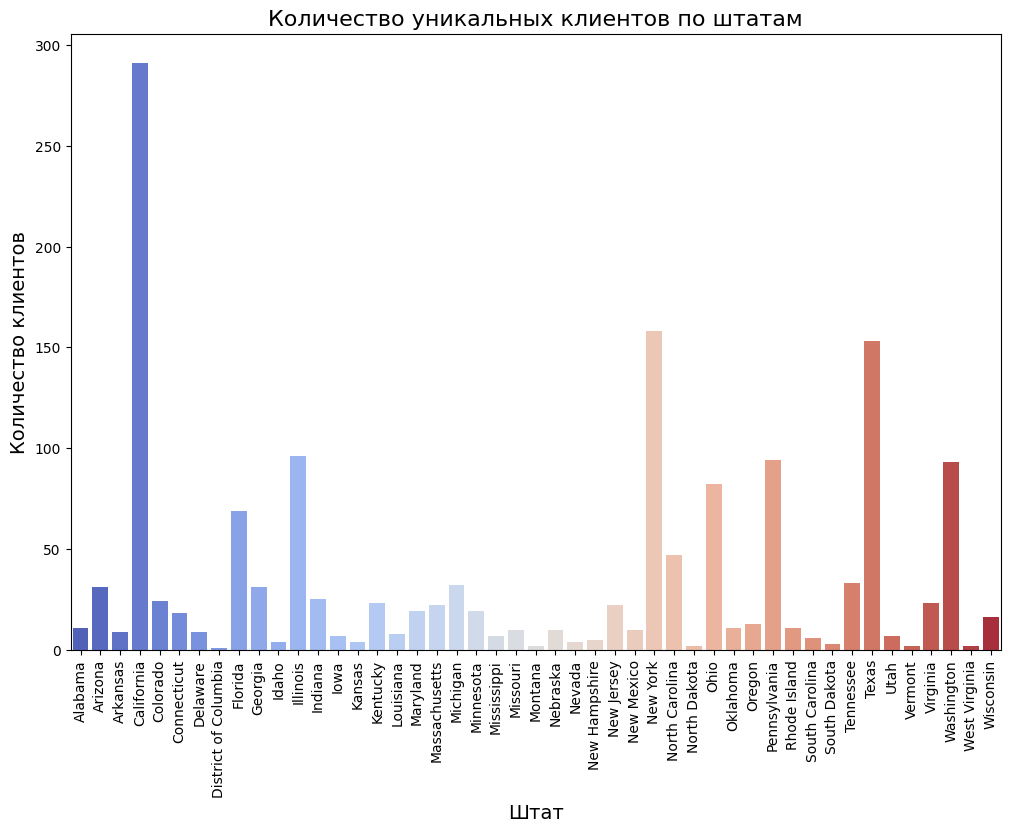

In [ ]:
# Подсчет количества уникальных клиентов по штатам
customers_by_state = df.groupby('state')['customerId'].nunique().reset_index()
customers_by_state.columns = ['State', 'Unique Customers']

# Визуализация с помощью столбчатой диаграммы
plt.figure(figsize=(12, 8))
sns.barplot(data=customers_by_state, x='State', y='Unique Customers', palette='coolwarm')
plt.title('Количество уникальных клиентов по штатам', fontsize=16)
plt.xlabel('Штат', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.xticks(rotation=90)
plt.show()

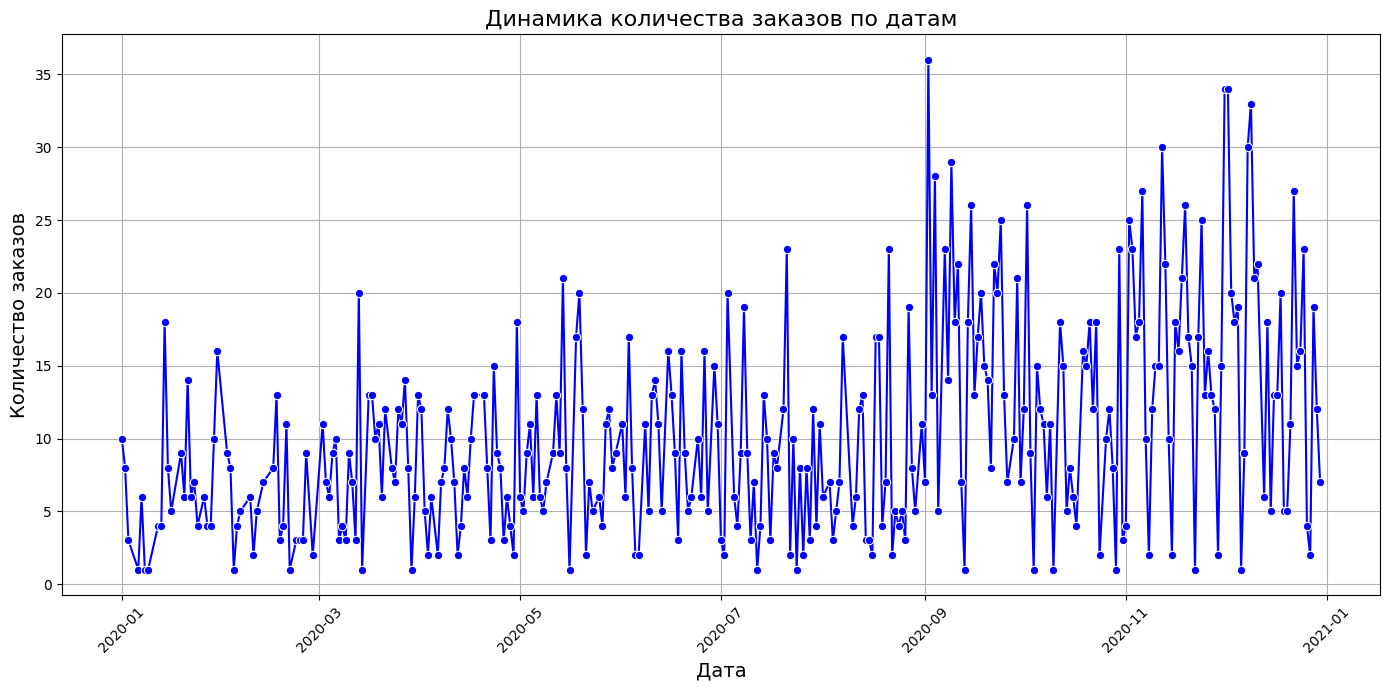

In [ ]:
# изучть динамику кол-ва заказов по дате заказов
# Группировка данных по дате и подсчет количества заказов
orders_by_date = df.groupby('orderDate').size().reset_index(name='Order Count')

# Построение линейного графика
plt.figure(figsize=(14, 7))
sns.lineplot(data=orders_by_date, x='orderDate', y='Order Count', marker='o', color='b')
plt.title('Динамика количества заказов по датам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

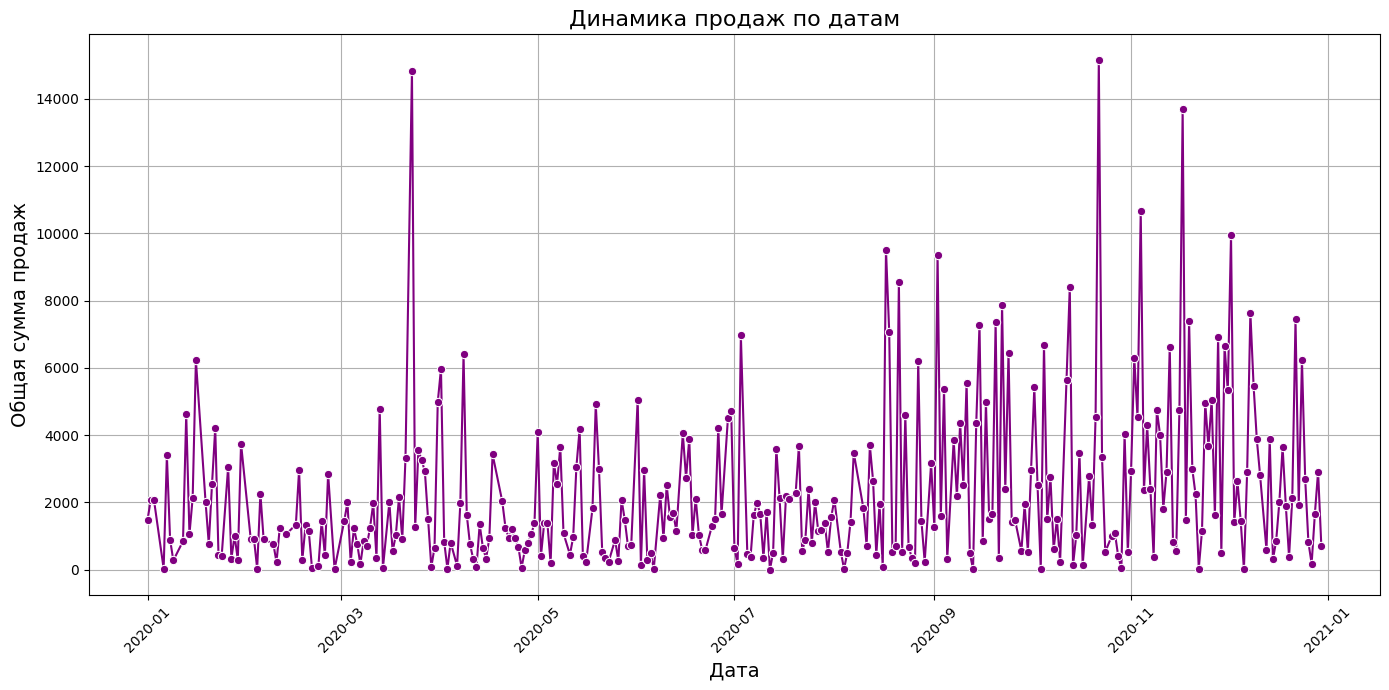

In [ ]:
# изучть динамику продаж по дате заказов
# Группировка данных по дате и подсчет общей суммы продаж
sales_by_date = df.groupby('orderDate')['sales'].sum().reset_index(name='Total Sales')

# Построение линейного графика
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_date, x='orderDate', y='Total Sales', marker='o', color='purple')
plt.title('Динамика продаж по датам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Общая сумма продаж', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

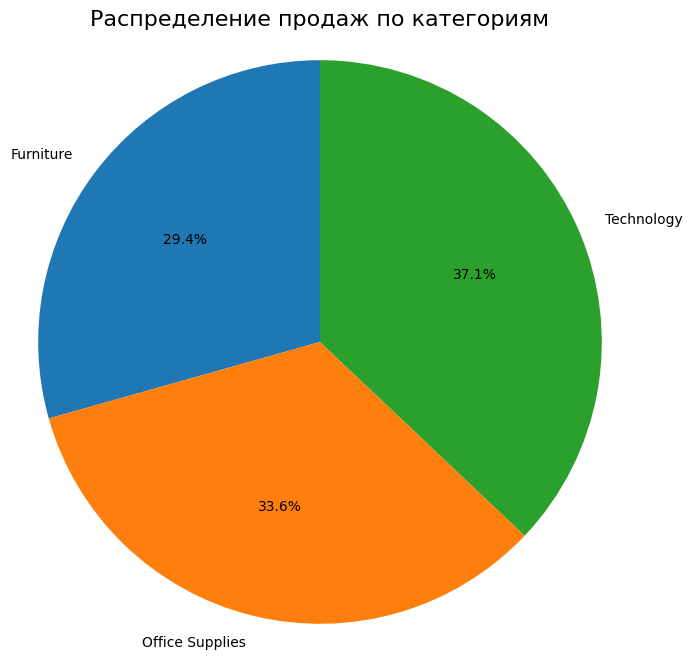

In [ ]:
# изучть распределение продаж по категориям заказов
# Группировка данных по категориям и подсчет общей суммы продаж
sales_by_category = df.groupby('category')['sales'].sum().reset_index(name='Total Sales')

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category['Total Sales'], labels=sales_by_category['category'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение продаж по категориям', fontsize=16)
plt.axis('equal')  # Делает круг идеально круглым
plt.show()

<ipython-input-23-0276c43de0e5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, y='city', x='Total Sales', palette='coolwarm', orient='h')


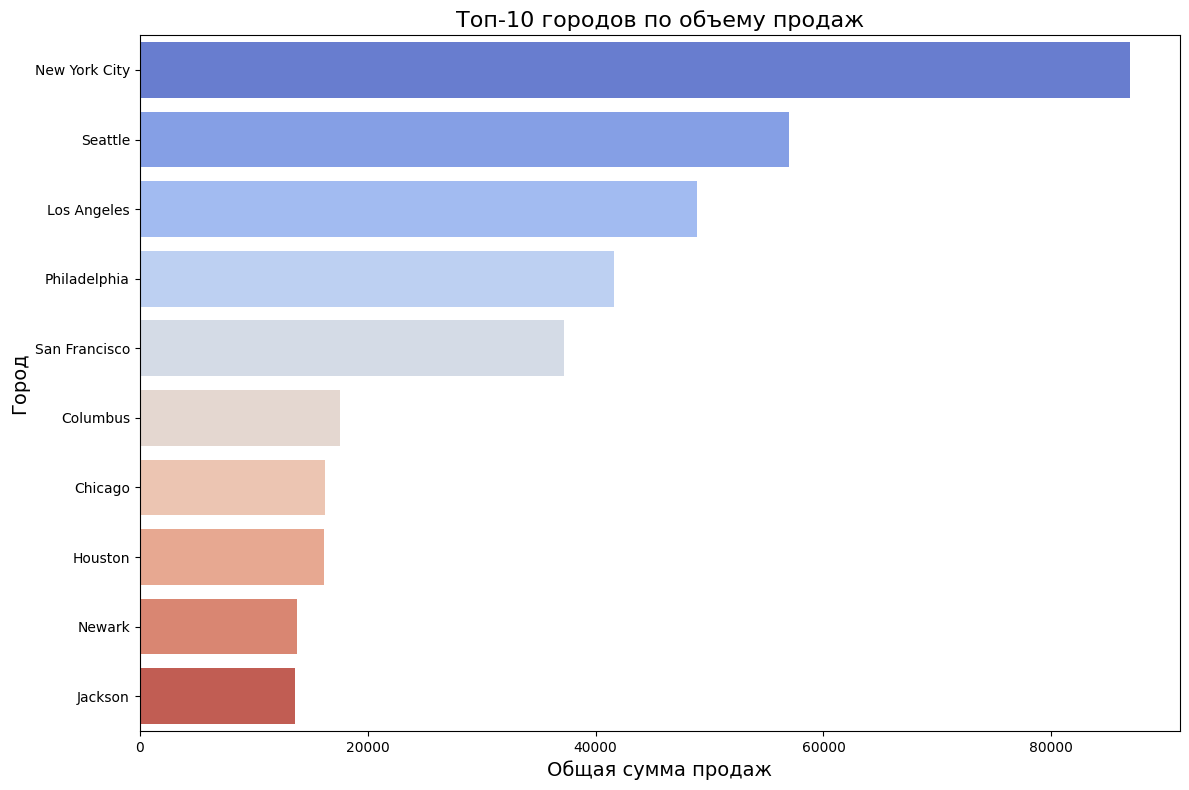

In [ ]:
# изучть распределение продаж по городам (штатам)
# Группировка данных по городам и подсчет общей суммы продаж
sales_by_city = df.groupby('city')['sales'].sum().reset_index(name='Total Sales')

# Сортировка по убыванию для удобства визуализации
sales_by_city = sales_by_city.sort_values(by='Total Sales', ascending=False)

# Выбор топ-10 городов с наибольшими продажами
top_cities = sales_by_city.head(10)

# Построение горизонтальной столбчатой диаграммы
plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities, y='city', x='Total Sales', palette='coolwarm', orient='h')
plt.title('Топ-10 городов по объему продаж', fontsize=16)
plt.xlabel('Общая сумма продаж', fontsize=14)
plt.ylabel('Город', fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-25-14c4cb23c4ed>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_by_orders, y='productName', x='Order Count', palette='viridis', orient='h')


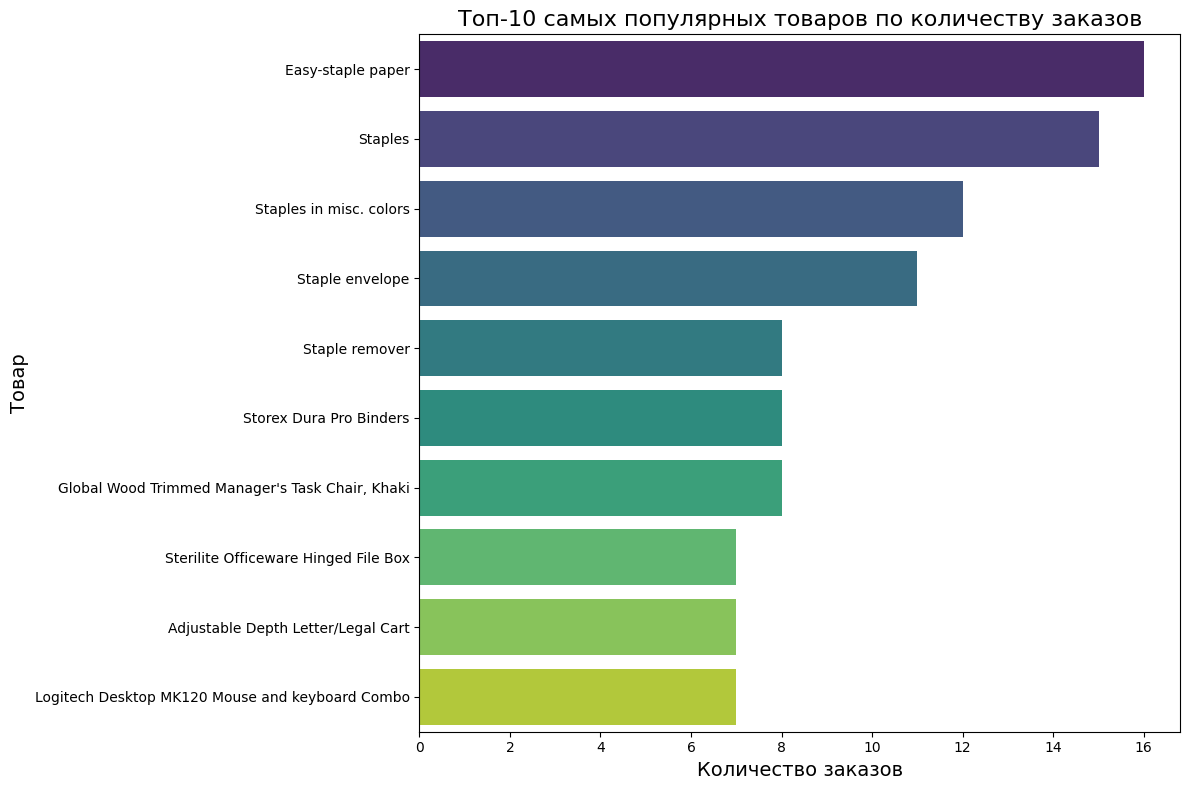

In [ ]:
# найти самые популярные товары (Product Name)
# Подсчет количества заказов для каждого товара
product_orders = df.groupby('productName').size().reset_index(name='Order Count')

# Сортировка по убыванию
top_products_by_orders = product_orders.sort_values(by='Order Count', ascending=False).head(10)

# Визуализация топ-10 товаров по количеству заказов
plt.figure(figsize=(12, 8))
sns.barplot(data=top_products_by_orders, y='productName', x='Order Count', palette='viridis', orient='h')
plt.title('Топ-10 самых популярных товаров по количеству заказов', fontsize=16)
plt.xlabel('Количество заказов', fontsize=14)
plt.ylabel('Товар', fontsize=14)
plt.tight_layout()
plt.show()

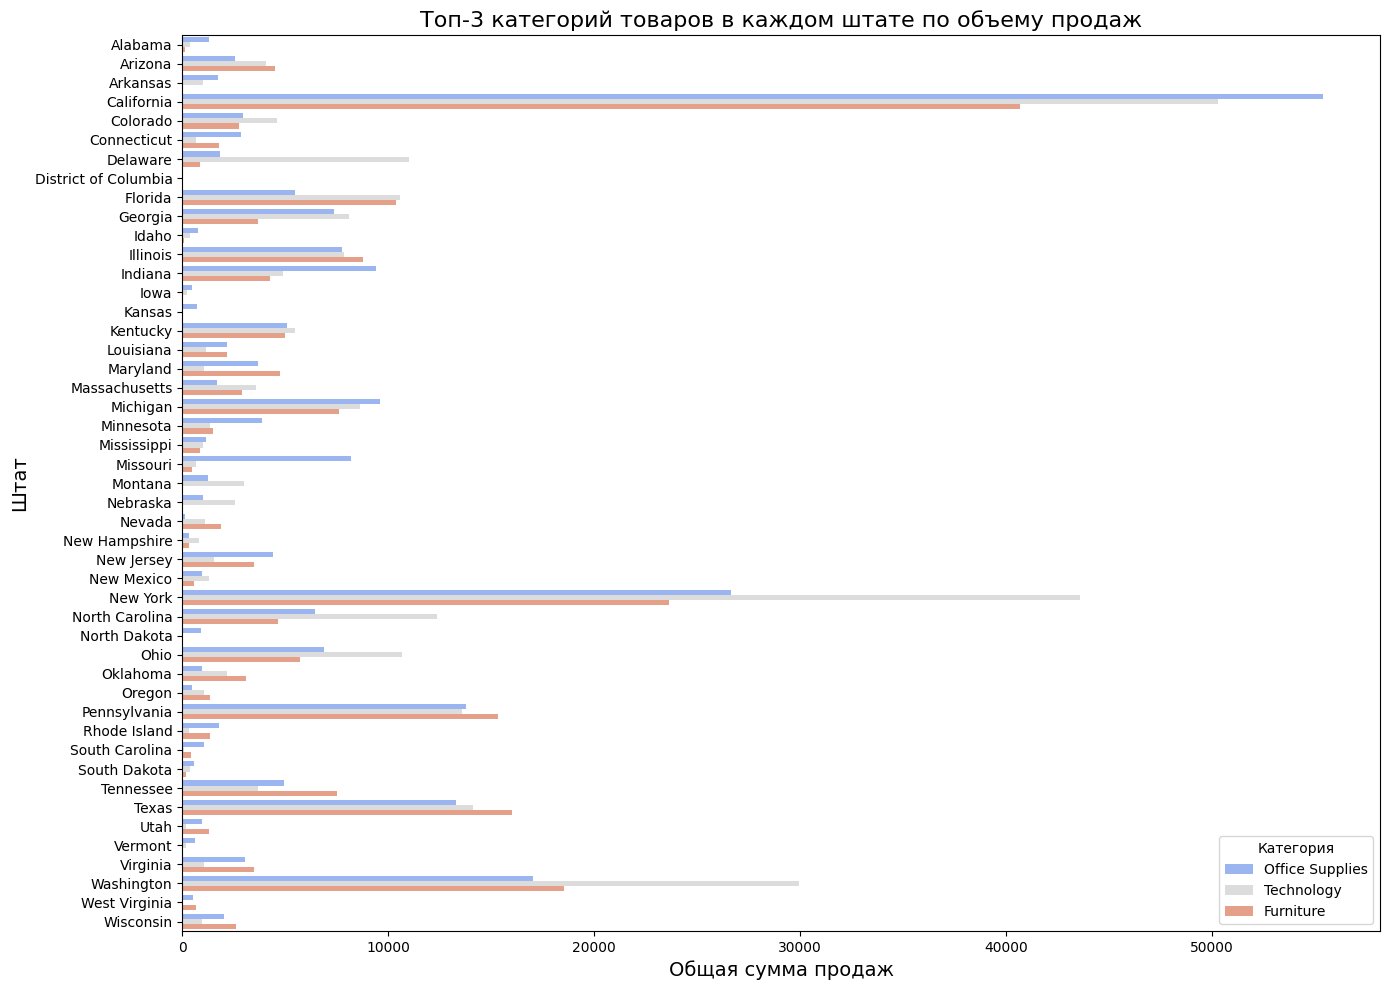

In [ ]:
# изучить распределение категорий внутри городов (штатам)

# Группировка данных по штатам и категориям, подсчет общего объема продаж
sales_by_state_category = df.groupby(['state', 'category'])['sales'].sum().reset_index(name='Total Sales')

# Сортировка по убыванию
sales_by_state_category = sales_by_state_category.sort_values(by=['state', 'Total Sales'], ascending=[True, False])

# Выбор топ-3 категорий для каждого штата
top_categories_by_state = sales_by_state_category.groupby('state').head(3)

# Визуализация
plt.figure(figsize=(14, 10))
sns.barplot(data=top_categories_by_state, y='state', x='Total Sales', hue='category', palette='coolwarm', orient='h')
plt.title('Топ-3 категорий товаров в каждом штате по объему продаж', fontsize=16)
plt.xlabel('Общая сумма продаж', fontsize=14)
plt.ylabel('Штат', fontsize=14)
plt.legend(title='Категория')
plt.tight_layout()
plt.show()

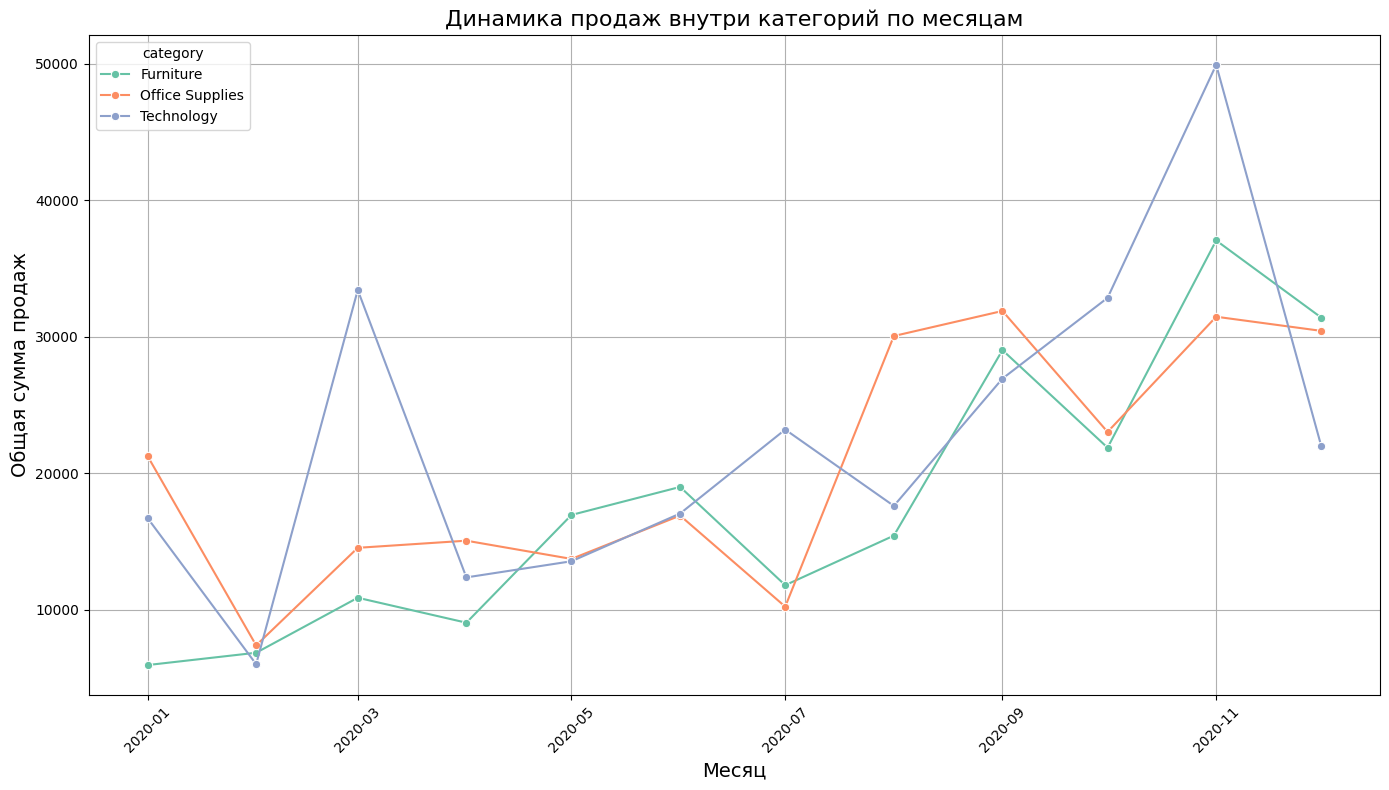

In [ ]:
# изучить динамику продаж внутри категорий
# Группировка данных по дате и категории, подсчет общей суммы продаж
sales_by_date_category = df.groupby(['orderDate', 'category'])['sales'].sum().reset_index(name='Total Sales')

# Извлечение года и месяца из даты
sales_by_date_category['YearMonth'] = sales_by_date_category['orderDate'].dt.to_period('M')

# Группировка данных по месяцам и категориям
sales_by_month_category = sales_by_date_category.groupby(['YearMonth', 'category'])['Total Sales'].sum().reset_index()

# Преобразование YearMonth обратно в формат datetime для удобства визуализации
sales_by_month_category['YearMonth'] = sales_by_month_category['YearMonth'].dt.to_timestamp()

# Построение линейного графика
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_by_month_category, x='YearMonth', y='Total Sales', hue='category', marker='o', palette='Set2')
plt.title('Динамика продаж внутри категорий по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Общая сумма продаж', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

1. Количество уникальных заказов: 1687
2. Количество уникальных клиентов: 693
3. Больше всего уникальных клиентов в штате Калифорния
4. Наиболее активна динамика с сентября 2020 года
5. Всплеск продаж был в апреле и ноябре 2020 года
6. Наиболее активны пользователи из города Нью-Йорк
7. Наиболее популярными товарами являются Easy-staple paper и Staples
8. Самыми активными штатами по категориям являются Калифорния, Нью-Йорк и Вирджиния
9.  Наиболее активна динамика продаж с сентября 2020 года по всем категориям